In [ ]:
import tensorflow as tf
from tensorflow import keras

## 1. 손글씨 숫자

In [ ]:
# 손글씨 숫자 이미지 데이터셋
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train : 손글씨 숫자 이미지
# y_train : 이미지가 의미하는 숫자
# x_test : 손글씨 숫자 이미지
# y_test : 이미지가 의미하는 숫자

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 손 글씨 숫자 이미지 데이터는 0 ~ 255 사이의 값을 가짐
# 모델 훈련에 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경
# 계산하기 쉽게 숫자 다운시킴
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [ ]:
# 딥러닝
# Model 생성
model = tf.keras.models.Sequential([
                                   # 크기 28*28의 배열을 입력받아 1차원 배열로 변환
                                   # 딥러닝 레이어 아님
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   # 히든레이어의 노드(파라미터) 갯수는 128개, 활성화 함수로 relu 사용 
                                   # 활성화 함수에 따라 노드 갯수가 달라짐(128개 혹은 255개)
                                   # relu : Gradient Descent
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   # 오버피팅 방지, 이전 레이어의 출력을 20% 섞음
                                   # 딥러닝 레이어 아님
                                   tf.keras.layers.Dropout(0.2),
                                   # 출력레이어의 노드개수를 10개로 설정, 활성화 함수는 softmax
                                   tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
              # 기울기 수정 알고리즘
              # activation='softmax'에 따라 달라짐
              optimizer='adam', 
              # relu와 값 사이의 차이 : 오차함수
              # activation='softmax'에 따라 달라짐
              loss='sparse_categorical_crossentropy', 
              # 퍼센테이지로 나옴
              metrics=['accuracy']  
)

In [ ]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)
# loss 하락 => accuracy 상승

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1404 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1053 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0855 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0561 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9849
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0680 

[0.06797613203525543, 0.9807999730110168]

In [ ]:
# x_train의 랜덤한 가격을 추출
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(len(x_train))
image = x_train[idx]

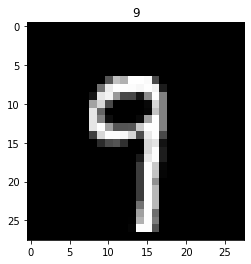

In [ ]:
# image를 확인
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [ ]:
# colab파일에 이미지 업로드
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('업로드 파일 이름 : {name}, 용량 : {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
업로드 파일 이름 : image.png, 용량 : 912 bytes


/content/image.png


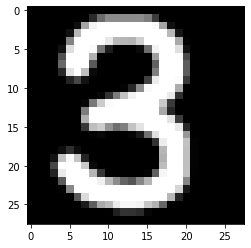

In [ ]:
# image file의 경로 설정
cur_dir = os.getcwd()
# print(cur_dir)
img_path = os.path.join(cur_dir, 'image.png')
print(img_path)
cur_img = Image.open(img_path)

# 28 * 28 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

# color image일 경우 RGB평균값으로 GRAY SCALE로 적용
try :
  image = np.mean(image, axis=2)
except:
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로 MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing (255로 나눠줌)
# 정규화 (0~1)
image = image.astype(np.float32) / 255

# 화면에 출력
# 0 ~ 1의 값이 들어오면 소수점에 의해 검은색(0) 흰색(1)으로 표현
plt.imshow(image, cmap='gray')
plt.show()

# 크기가 너무 작으면 숫자 제대로 인식 못할 수 있음
# 크기가 적당히 있는 원본 이미지에서 resize로 크기를 줄여서 맞추는 것이 좋음

In [ ]:
# shape를 변경하여 학습된 model에 넣고 결과를 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이즈
print(model.predict(image))
print('model이 예측한 값은 {} 입니다'.format(np.argmax(model.predict(image), -1)))

[[2.9446429e-28 5.4138115e-15 1.4618019e-10 1.0000000e+00 1.0402266e-33
  9.7181784e-15 5.5930135e-25 1.3945909e-27 1.1809951e-18 2.0533499e-27]]
model이 예측한 값은 [3] 입니다


## 2. 패션

In [ ]:
# Dataset

mnist = keras.datasets.fashion_mnist
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
# training set의 각 class별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [ ]:
# test set의 각 class별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

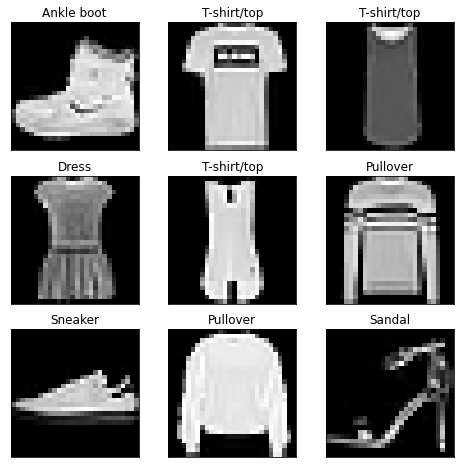

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_name[train_labels[i]])
plt.show()

In [ ]:
# 데이터 전처리
# image를 0~1 사이 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32) / 255
test_image = test_images.astype(np.float32) / 255

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [ ]:
# dataset 만들기
# shuffle : 셔플을 하지 않으면 다음에 들어갈 데이터가 중복되어 들어갈 수 있음. epochs 할 때 shuffle 사용
# batch : 한번에 여러개의 이미지를 넣어주는데 몇 개씩 넣을 것인지 설정
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape : (64, 28, 28)
Label batch shape : (64, 10)


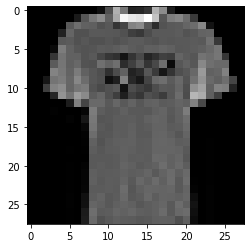

label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Dataset을 통해 반복(iterate)
imgs, lbs = next(iter(train_dataset))
print(f'Feature batch shape : {imgs.shape}')
print(f'Label batch shape : {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'label : {lb}')

In [ ]:
# Custom Dataset 만들기
a = np.arange(10)
print(a) 

print('-' * 50)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)
print('-' * 50)

for x in ds_tensors :
  print(x)

[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
--------------------------------------------------
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [ ]:
# shuffle(정수) : 큐 사이즈(정수) 만큼 셔플. 10은 모두 셔플. 10보다 작으면 일부만 셔플
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [ ]:
# 3 에폭을 돌린다
# 1에폭 : 10번 셔플 후 2개씩 묶음 => ds_tensors에서 tensor 5개 생성 (중복없음)
for _ in range(3):  
  for x in ds_tensors:  
    print(x)
  print('-' * 50)

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([36 16], shape=(2,), dtype=int64)
tf.Tensor([9 4], shape=(2,), dtype=int64)
tf.Tensor([64 49], shape=(2,), dtype=int64)
tf.Tensor([81 25], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([25 16], shape=(2,), dtype=int64)
tf.Tensor([4 0], shape=(2,), dtype=int64)
tf.Tensor([81  9], shape=(2,), dtype=int64)
tf.Tensor([49  1], shape=(2,), dtype=int64)
tf.Tensor([36 64], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([49 64], shape=(2,), dtype=int64)
tf.Tensor([ 9 81], shape=(2,), dtype=int64)
tf.Tensor([16 25], shape=(2,), dtype=int64)
tf.Tensor([36  1], shape=(2,), dtype=int64)
tf.Tensor([4 0], shape=(2,), dtype=int64)
--------------------------------------------------


In [ ]:
# 텐서플로우에서는 3가지 모델 작성방법을 제공
# 가장 간단하고 쉽게 만들 수 있는 방법 -> keras Sequential API를 상용

def create_seq_model():
  model = keras.Sequential()  # 하이퍼 파라미터 sequential 모델 객체 생성
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))  # 20% test
  model.add(keras.layers.Dense(10, activation='softmax')) # 10개의 결과 내보내기
  return model

In [ ]:
seq_model = create_seq_model()

In [ ]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keras Functional API 사용
# Sequential은 쌓이는 구조로만 모델을 생성할 수 있기 때문에 다양한 가지치기와 같은 모델 레이어를 생서하려면
# create_func_model과 같은 형태로 생성하여 사용

def create_func_model():
  inputs = keras.Input(shape=(28, 28))
  flatten = keras.layers.Flatten()(inputs)  # keras.layers.Flatten()의 임의의(_) 객체 생성 -> 그 객체의 파라미터실행(=>_(inputs)) -> 변수에 대입(=>flatten = _(inputs))
  dense = keras.layers.Dense(128, activation='relu')(flatten)
  drop = keras.layers.Dropout(0.2)(dense)
  outputs = keras.layers.Dense(10, activation='softmax')(drop)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
func_model = create_func_model()

In [ ]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# keras.Model을 상속받아 사용
# 파이토치가 주로 사용하는 방법

class SubClassModel(keras.Model):
  def __init__(self):
    super(SubClassModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28, 28))
    self.dense1 = keras.layers.Dense(128, activation='relu')
    self.drop = keras.layers.Dropout(0.2)
    self.dense2 = keras.layers.Dense(10, activation='softmax')

  def call(self, x, training=False):  # keras.Model을 사용했기 때문에 클래스 객체를 실행시 자동으로 call 함수 실행 => 자동콜백
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    return self.dense2(x)
    


In [ ]:
subClassModel = SubClassModel()

In [ ]:
inputs = tf.zeros((1, 28, 28))
subClassModel(inputs) # call(inputs)함수 실행
subClassModel.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_12 (Dense)            multiple                  100480    
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_13 (Dense)            multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습
# Keras API 사용
learning_rate = 0.001 # 적절한 값을 찾아야함 => 너무크면 기울기 변화가 커서 loss의 최적값 적용 안됌 / 너무 작으면 기울기변화가 미세해서 에폭을 많이 사용해야함
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 3.0739 - accuracy: 0.6048 - val_loss: 0.9508 - val_accuracy: 0.6726
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9548 - accuracy: 0.6547 - val_loss: 0.7927 - val_accuracy: 0.7053
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8493 - accuracy: 0.6771 - val_loss: 0.7140 - val_accuracy: 0.7190
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7850 - accuracy: 0.6948 - val_loss: 0.6570 - val_accuracy: 0.7398
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7591 - accuracy: 0.7015 - val_loss: 0.6513 - val_accuracy: 0.7391
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7484 - accuracy: 0.7034 - val_loss: 0.6387 - val_accuracy: 0.7341
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7263 - accuracy: 0.7116 - val_loss: 0.6301 - val_accuracy: 0.7437
Epoch 

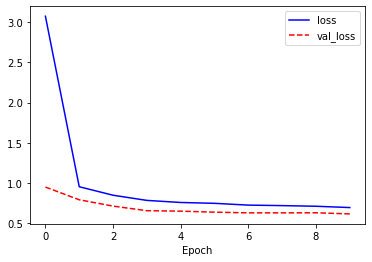

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss') # train_loss 학습이 잘 되고있는지 확인
plt.plot(history.history['val_loss'], 'r--', label='val_loss') # test_loss 검증이 잘 되고있는지 확인
plt.xlabel('Epoch')
plt.legend()  # 제목
plt.show()

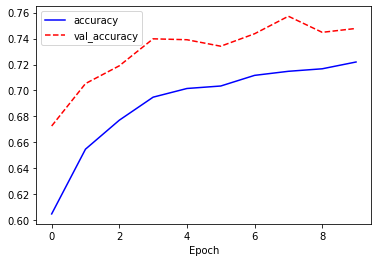

In [ ]:
plt.plot(history.history['accuracy'], 'b-', label='accuracy') # train_loss 학습이 잘 되고있는지 확인
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy') # test_loss 검증이 잘 되고있는지 확인
plt.xlabel('Epoch')
plt.legend()  # 제목
plt.show()

In [ ]:
# Model 저장하고 불러오기
# 학습된 결과를 저장해놓고 사용. 또는 이어서 학습하기 위해 모델을 저장하고 불러오는 방법

seq_model.save_weights('seq_model.ckpt')  # checkpoint, seq_model.ckpt.data-00000-..., seq_model_ckpt.index 파일 생성 후 저장됨

In [ ]:
# 새로운 모델 생성
# 어떠한 레이어 없이 껍데기 모델 객체만 생성
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
seq_model_2.evaluate(test_dataset)  # 정확도 : 9%

157/157 [==============================] - 1s 3ms/step - loss: 333.4773 - accuracy: 0.0964


[333.4772644042969, 0.09640000015497208]

In [ ]:
# 학습된 ckpt를 적용
seq_model_2.load_weights('seq_model.ckpt')

In [ ]:
seq_model_2.evaluate(test_dataset)  # 정확도 : 74% => 정확도 상승

157/157 [==============================] - 1s 6ms/step - loss: 0.6169 - accuracy: 0.7478


[0.616940975189209, 0.7477999925613403]

In [ ]:
# Model 전체를 저장하고 불러오기
seq_model.save('seq_model') # seq_model 파일 생성 후 저장

INFO:tensorflow:Assets written to: seq_model/assets


In [ ]:
seq_model_3 = keras.models.load_model('seq_model')

In [ ]:
seq_model_3.evaluate(test_dataset)  # 정확도 : 74%

157/157 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.7478


[0.616940975189209, 0.7477999925613403]

- 분석에 따라 모델은 분류, 예측 등 다양함
- 데이터 전처리를 해서 정리를 하고 모델에 넣어줌
- 모델과 데이터가 적절히 맞아야 함